In [ ]:
#Required Libraries
import random
import numpy as np

import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
#Defining the number of locations and vehicles
num_locations = 20 # Define the number of locations (eg 10)
locations = [(random.randint(0,100), random.randint(0,100)) for _ in range(num_locations)] # Creating a list of tuples representing location coordinates -
            #using a random number generator
depot = (50,50)# Defining the coordinates for the depot
num_vehicles = 5 # Defining the number of vehicles

In [ ]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
Finishing setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) #building an individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual ) #building a population)


In [ ]:
# Fitness Function

def evalVRP(individual):
    #The fitness evaluation function
    #Calculating the total distance of routes and the standard deviation among the distances and returning (distance, std dev)
    total_distance =0
    distances = []
    for i in range(num_vehicles):
      vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

      vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route) -1))
      total_distance += vehicle_distance
      distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance , balance_penalty
toolbox.register("evaluate", evalVRP)

In [ ]:
# Genetic Operators
#Configuring the genetic operators
toolbox.register("mate", tools.cxPartialyMatched)# Chooseing a crossover method)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb = 0.05)# Choosing a mutation method)
toolbox.register("select", tools.selTournament, tournsize=3)#selection method)
#Select is simpler, try tournament selection or roulette selection.
#Mate and mutate - try methods used in Travelling Salesman Problem

In [ ]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    #function to visualize the routes
    plt.figure()
    for(x,y) in locations:
      plt.plot(x,y,'bo')
    plt.plot(depot[0], depot[1], 'rs')

    for i in range(num_vehicles):
      vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
      plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	503.664	6.64861
1  	213   	491.889	8.49343
2  	243   	486.079	9.5009 
3  	232   	480.219	8.87983
4  	233   	475.862	5.1044 
5  	218   	467.224	8.36619
6  	213   	466.135	6.211  
7  	233   	464.895	8.90163
8  	219   	461.367	9.55633
9  	209   	453.658	11.3502
10 	224   	447.371	10.0713
11 	230   	456.345	3.67041
12 	230   	457.14 	10.1526
13 	217   	449.85 	9.38067
14 	231   	451.954	9.43203
15 	250   	453.342	10.1526
16 	238   	446.244	9.05232
17 	236   	442.714	4.62997
18 	225   	438.055	8.63664
19 	225   	432.842	8.63664
20 	209   	426.35 	4.06253
21 	232   	423.809	7.52351
22 	237   	420.033	4.64686
23 	217   	416.35 	4.64686
24 	227   	420.635	4.64686
25 	246   	416.085	4.64686
26 	233   	418.604	4.64686
27 	219   	413.274	4.64686
28 	229   	407.307	4.64686
29 	223   	404.176	4.64686
30 	238   	407.508	4.91856


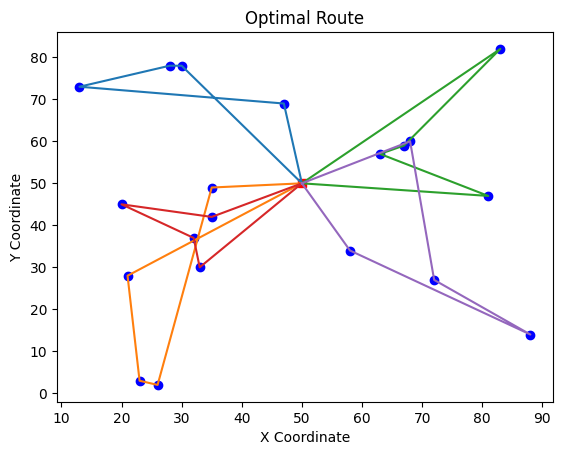

In [ ]:
# Running the Genetic Algorithm
import numpy as np
def main():
    random.seed(42)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

